In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


I.INTRODUCTION

1.1 BACKGROUND

Many quantums operations include multi-controlled Toffoli(MCX) gates.
Among the most notable are Grover Operator,logical AND operator,various state preparation algorithms,and arithmetic comparators.
This Task focuses on the implementation of the MCX gate with a limited qubit count and circuit depth.

1.2 PROBLEM

Decompose an MCX gate with 14 control qubits into single-qubit and double-qubit CX gates. You may use up to five clean auxiliary qubits and should release(uncompute) them at the end of the circuit.Thus, the circuit can use no more than 20 total qubits: 14 control qubits,one target, and up to five auxiliary qubits.

IMPORTANT: Make sure that when you submit a circuit,the order of the qubits is indeed as follows: First the 14 control qubits, then the target qubit, then any auxiliary.This will help us validate the circuit.

1.3 METRIC

The winning solution will achieve this using a circuit of minimal depth

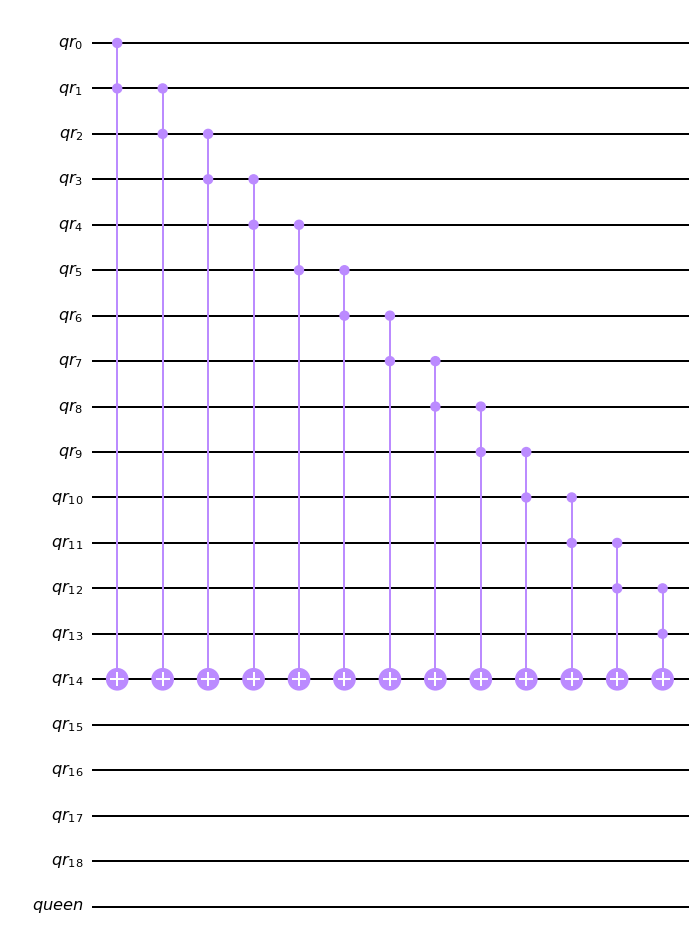

In [2]:
#Importing the standard qiskit librairies

from qiskit import QuantumRegister, AncillaRegister

#Define a 20 qubit-quantum circuit with 19 quantum qubits and one ancilla qubits

qr = QuantumRegister(19, name='qr')
ancilla = AncillaRegister(1, name='queen')
qc = QuantumCircuit(qr, ancilla)

#Define number of  control qubits
num_ctrl_qubits = 14

# Implement a multi-controlled Toffoli(MCX) gates with 14 control qubits,one target qubit,one ancilla qubit and an ancilla mode='recursion'
for i in range(0, num_ctrl_qubits - 1):
    qc.mcx([qr[i],qr[i+1]], 14, ancilla_qubits=True, mode= 'recursion')

# Drawing our circuit
qc.draw('mpl')


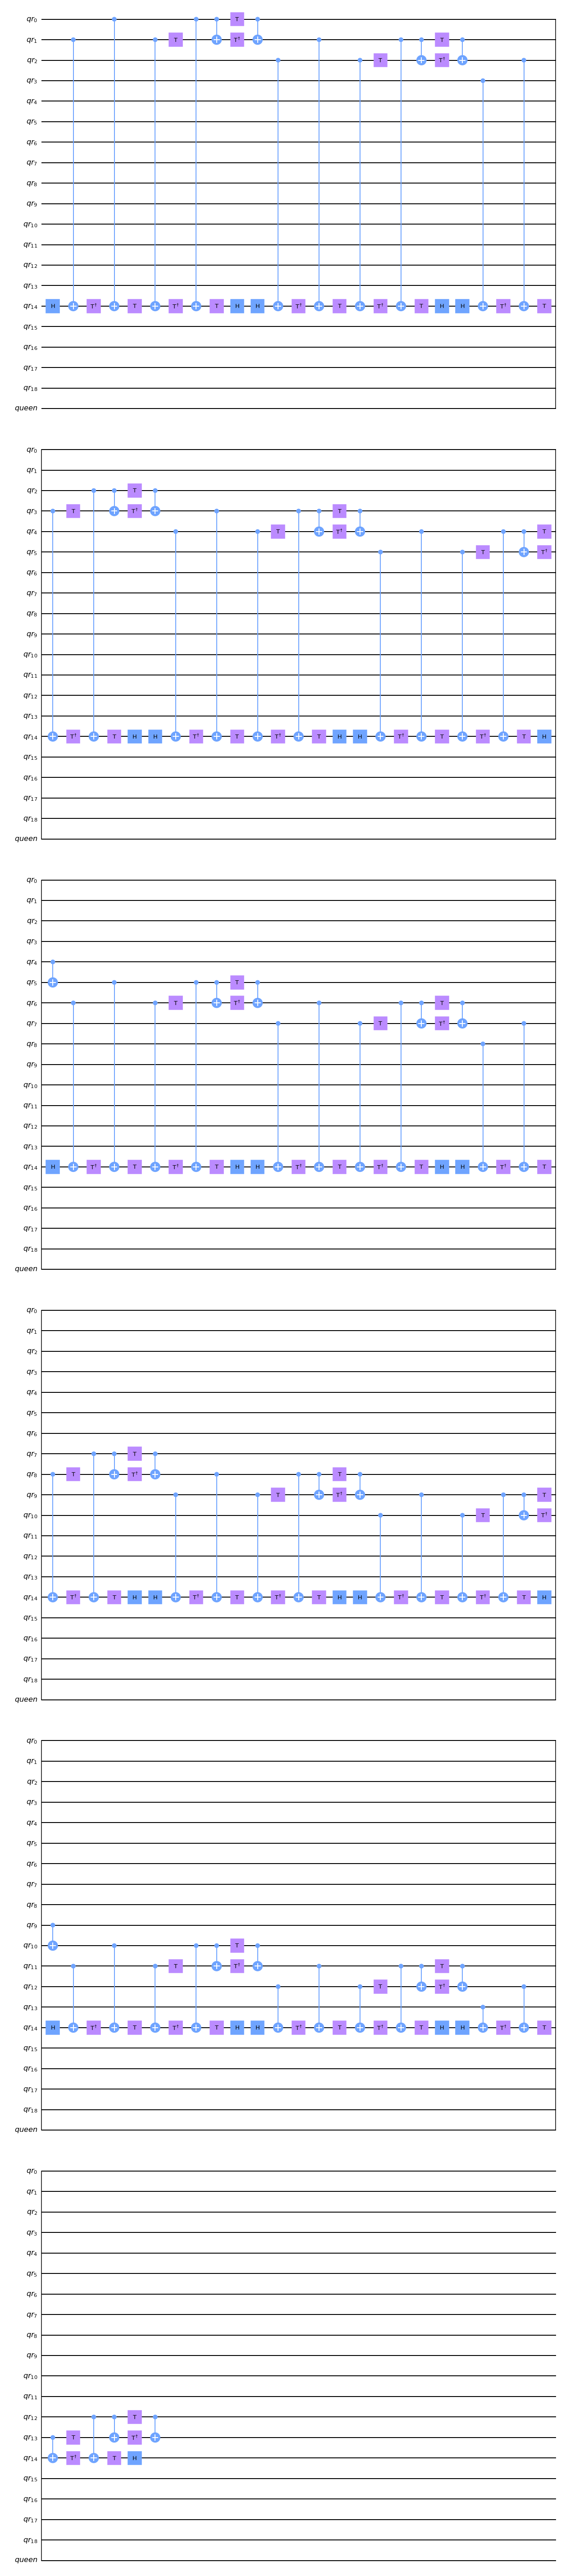

In [3]:
# Decompose our circuit into into single-qubit and double-qubit CX gates
mcx_circ = qc.decompose()
# Drawing our new circuit
mcx_circ.draw('mpl')

In [10]:
# Measure the depth of our circuit 
print('Depth:', mcx_circ.depth())
print('Gate counts:', mcx_circ.count_ops())

Depth: 131
Gate counts: OrderedDict([('cx', 78), ('t', 52), ('tdg', 39), ('h', 26)])
